In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Employee Perspective Questions
# These are the questions we will try to answer

## 1. Job Satisfaction
- What is the average satisfaction level among employees?
- Are there trends or patterns in job satisfaction levels over time?

## 2. Work-Life Balance
- How many hours, on average, do employees work per month?
- Is there a correlation between average monthly hours and job satisfaction?

## 3. Job Roles and Projects
- What are the common job roles and projects that employees are involved in?
- Are certain job roles or projects associated with higher job satisfaction?

## 4. Time Spent in the Company
- How long do employees typically stay with the company (time_spend_company)?
- Is there a correlation between the time spent in the company and employee churn?

## 5. Work Accidents and Promotions
- How frequently do employees experience work accidents or receive promotions?
- Is there a relationship between promotions and employee satisfaction?

## 6. Salary and Retention
- What is the distribution of salary levels among employees?
- Do employees with higher salaries tend to stay longer with the company?

## 7. Personal Growth Opportunities
- How many employees have received promotions in the last 5 years?
- Is there a correlation between promotions and job satisfaction?

## 8. Individual Performance Evaluation
- What is the distribution of performance evaluations among employees?
- Are employees with lower performance evaluations more likely to leave?

## 9. Demographic Considerations
- Are there demographic factors (age, gender, etc.) that correlate with job satisfaction or retention?
- Do certain groups of employees have unique patterns in terms of churn?

## 10. Employee Feedback and Surveys
- Are there any employee feedback surveys or comments available?
- Can we derive insights from qualitative data to understand employees' sentiments?


In [2]:
df=pd.read_csv('employee_churn.csv')

In [3]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

## The first thing that we should see whether dataset is balanced or not

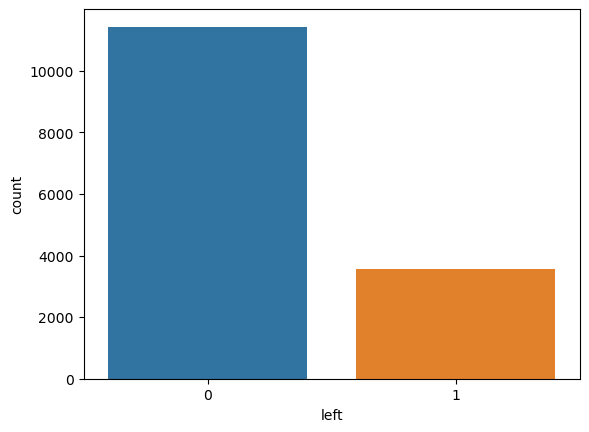

In [10]:
sns.countplot(x='left',data=df)
plt.show()

### Dataset is clearly unbalanced , we will take care of this in the model development phase

In [12]:
# Average Satisfaction Level of Employees
print(f"Average Satisfaction Level of Employees: {df['satisfaction_level'].mean()}")

Average Satisfaction Level of Employees: 0.6128625725145028


# 1. Lets analyze the job satisfaction attribute

In [20]:
df['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

C:\Users\Awais\AppData\Local\Temp\ipykernel_10332\1219049572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


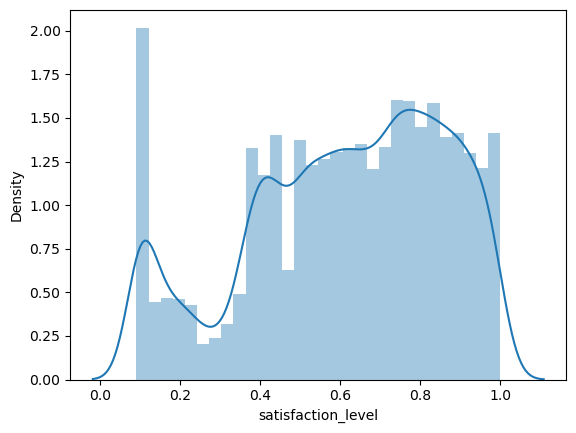

In [19]:
sns.distplot(df['satisfaction_level'])
plt.show()

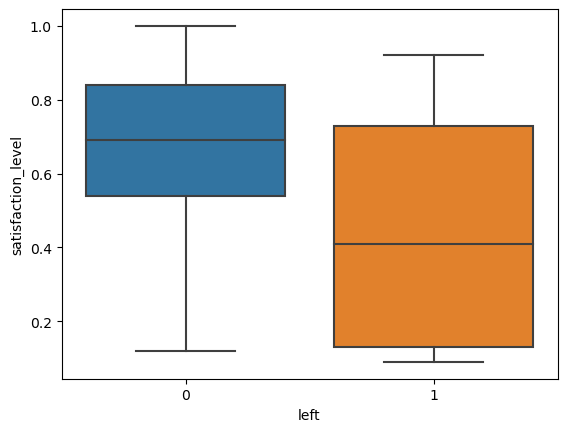

In [22]:
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.show()

## Result 1: From 1st plot we have seen the distribution of satisfaction level and from 2nd plot we have seen that mostly the employees left had satisfaction level between 0.1 and 0.7 
### There can be several reasons  
### 1. Employees with high satisfaction level might have found more good job i.e people with S_L 0.7
### 2. Employee with low satisfaction level because they didnt like the job i.e people with S_L 0.1

# 2. Lets check the last evaluation attribute

### Employees are evaluated between 0 and 1

In [26]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

C:\Users\Awais\AppData\Local\Temp\ipykernel_10332\180732002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


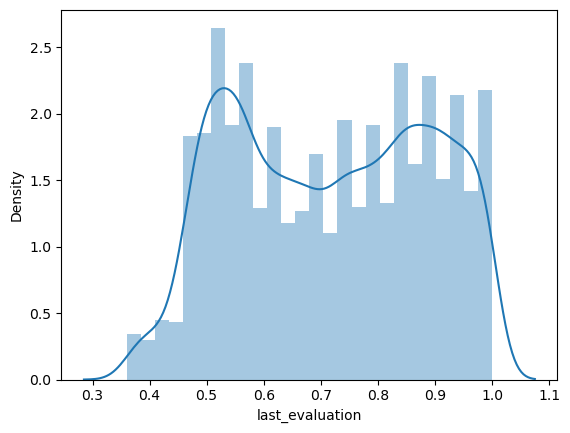

In [25]:
sns.distplot(df['last_evaluation'])
plt.show()

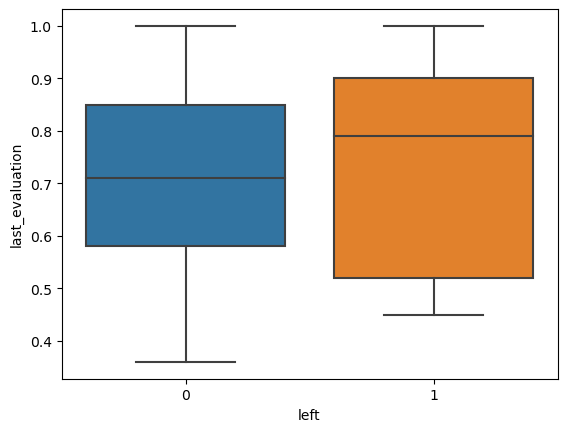

In [27]:
sns.boxplot(x='left',y='last_evaluation',data=df)
plt.show()

## Result : Moslty employees who got the high evaluation has left the company

# 3. No of Projects

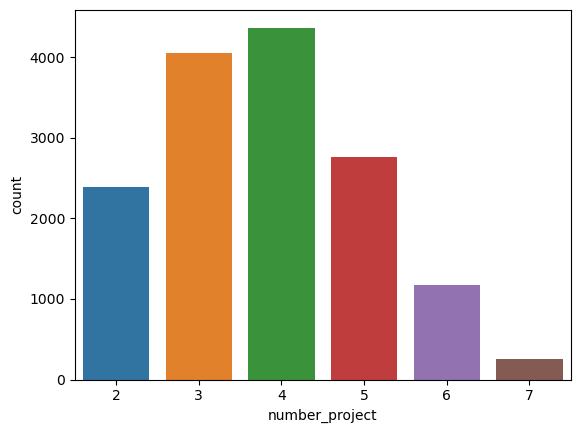

In [34]:
sns.countplot(x='number_project',data=df) # I have used this because unique values were less
plt.show()

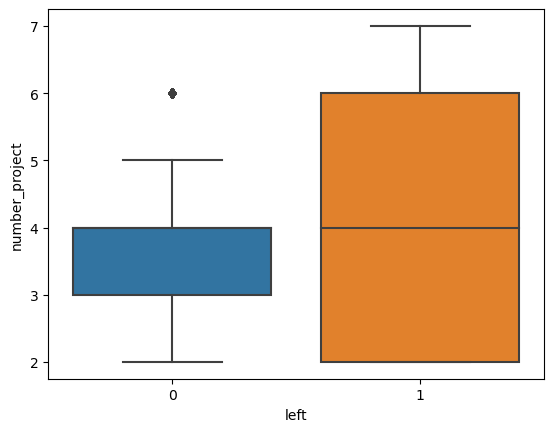

In [36]:
# Lets examine  the relationship between number of projects and employees left
sns.boxplot(x='left',y='number_project',data=df)
plt.show()

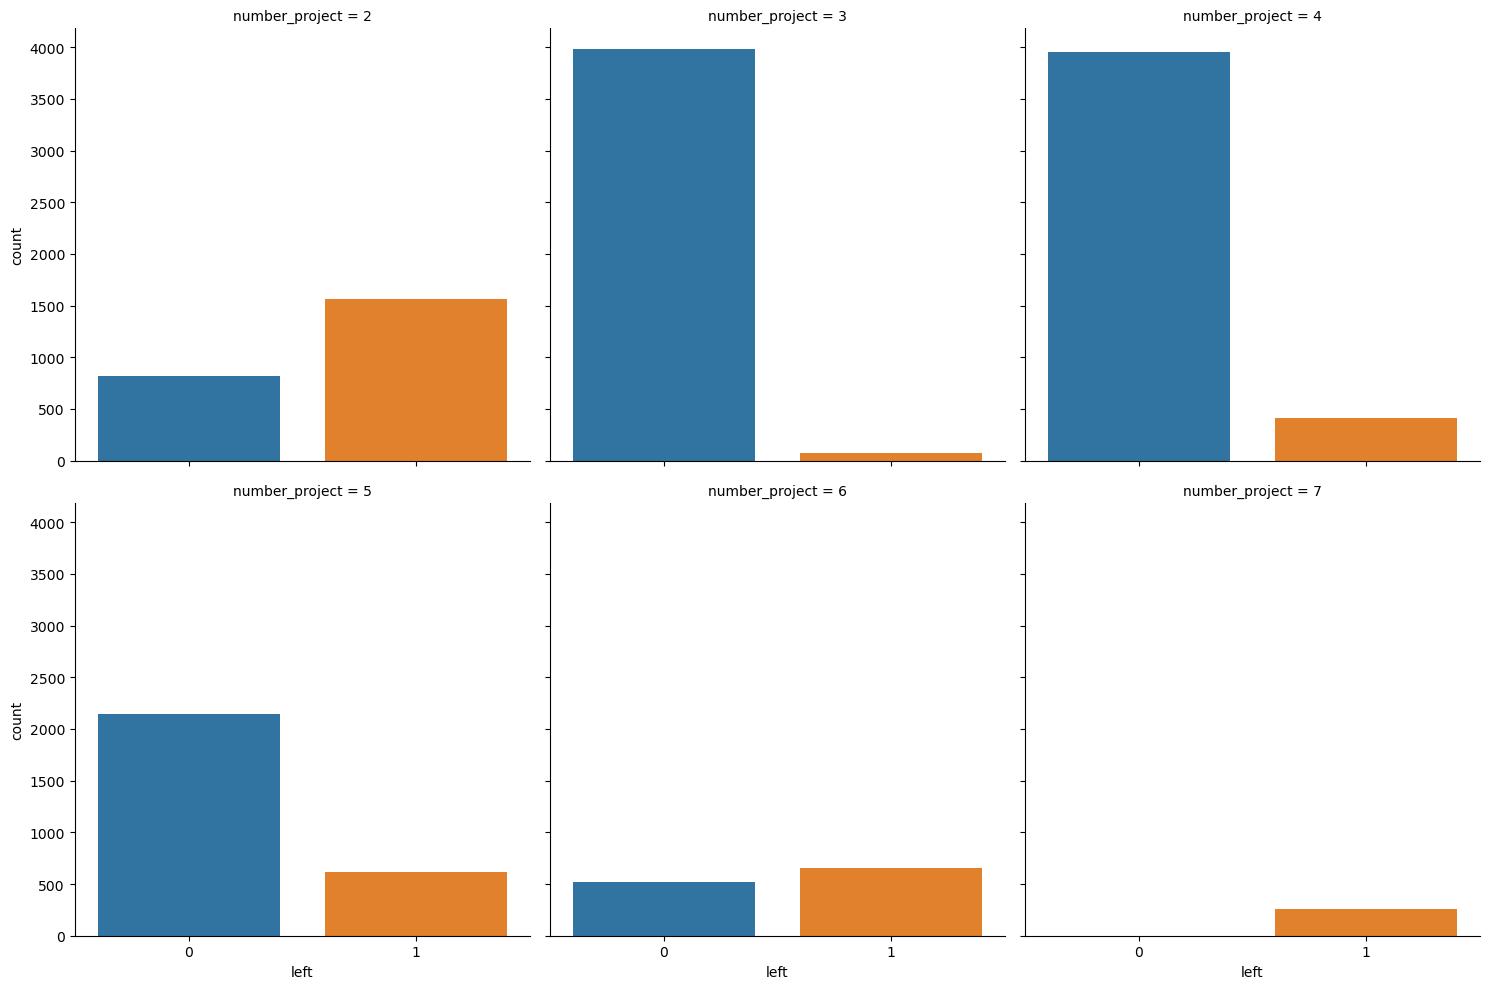

<Figure size 800x900 with 0 Axes>

In [45]:
# Set the number of columns you want in each row
cols_per_row = 3

# Seaborn catplot with two columns
sns.catplot(x='left', col='number_project', kind='count', data=df, col_wrap=cols_per_row)

# Setting a larger figure size for better visualization
plt.figure(figsize=(8, 9))

# Display the plots
plt.show()

## Result: Employee with less project like 2 and more project like 7 have churned
### Reason can be for 7 projects can be that he/she is a good employee and not satisfied by the company so he/she left

### Lets analyze the relationship between no of projects and last evaluation

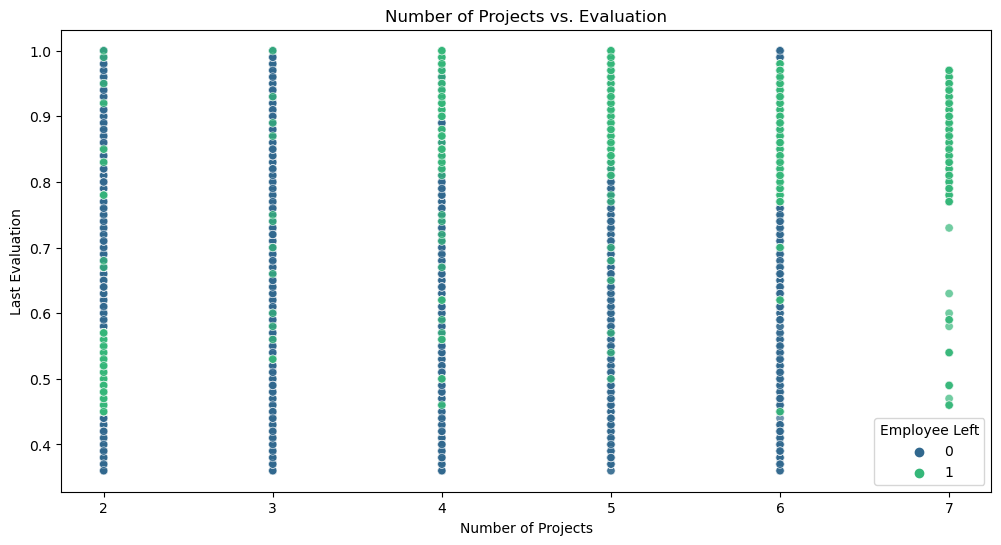

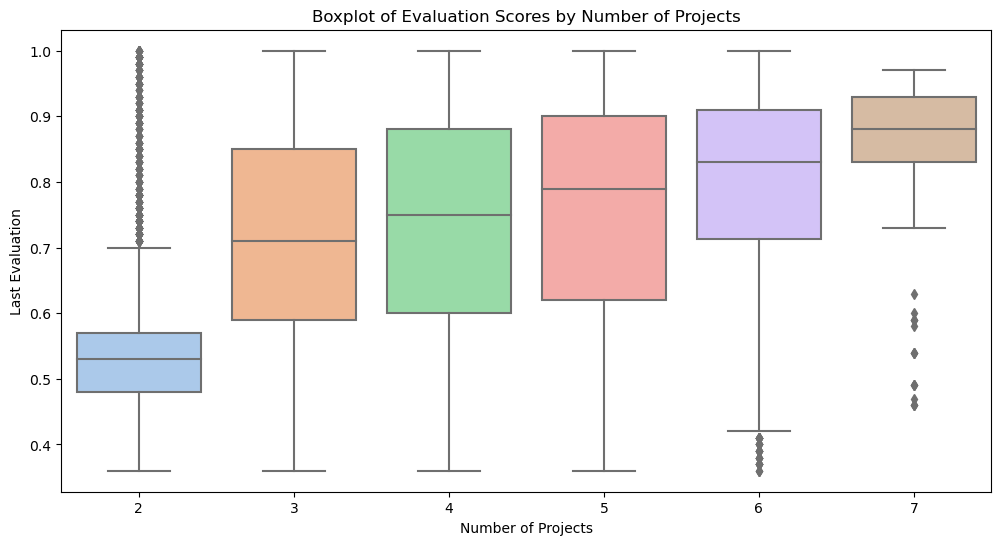

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_project', y='last_evaluation', hue='left', data=df, palette='viridis', alpha=0.7)
plt.title('Number of Projects vs. Evaluation')
plt.xlabel('Number of Projects')
plt.ylabel('Last Evaluation')
plt.legend(title='Employee Left')
plt.show()

# Box plot for Number of Projects
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_project', y='last_evaluation', data=df, palette='pastel')
plt.title('Boxplot of Evaluation Scores by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Last Evaluation')
plt.show()

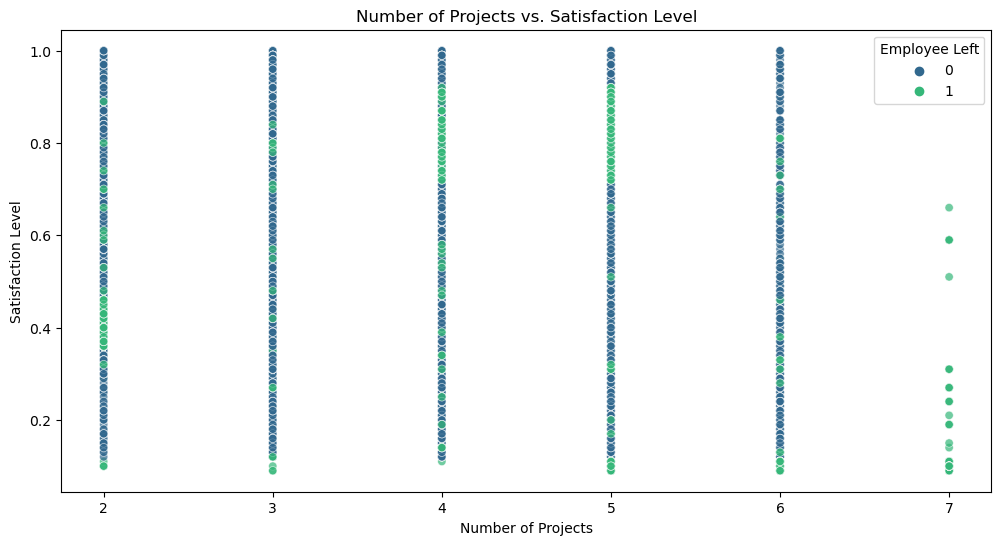

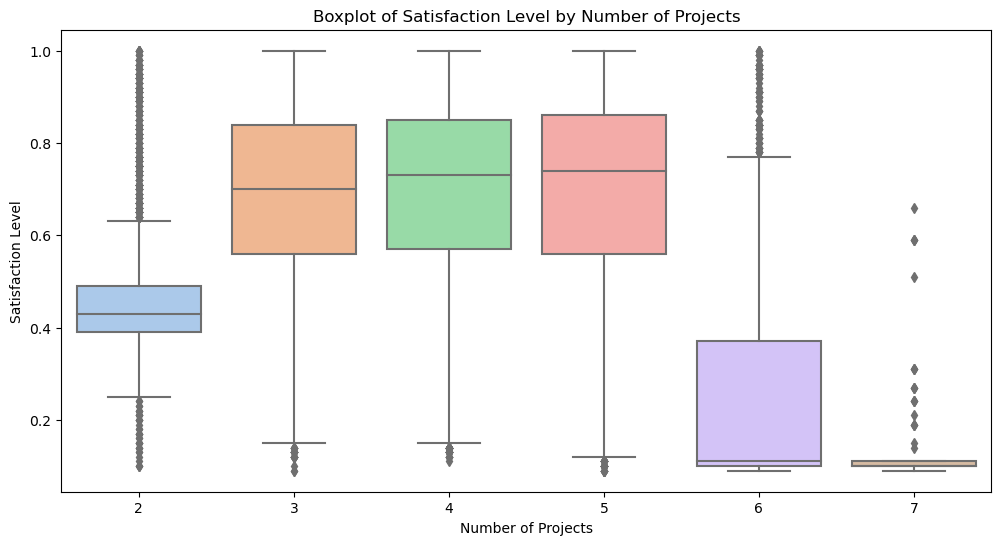

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_project', y='satisfaction_level', hue='left', data=df, palette='viridis', alpha=0.7)
plt.title('Number of Projects vs. Satisfaction Level')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.legend(title='Employee Left')
plt.show()

# Box plot for Number of Projects
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_project', y='satisfaction_level', data=df, palette='pastel')
plt.title('Boxplot of Satisfaction Level by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.show()

## Very Important Result: Employees with higher number of projects have high evaulation but they have less satisfaction 

In [48]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

# 4. Average Monthly Hours

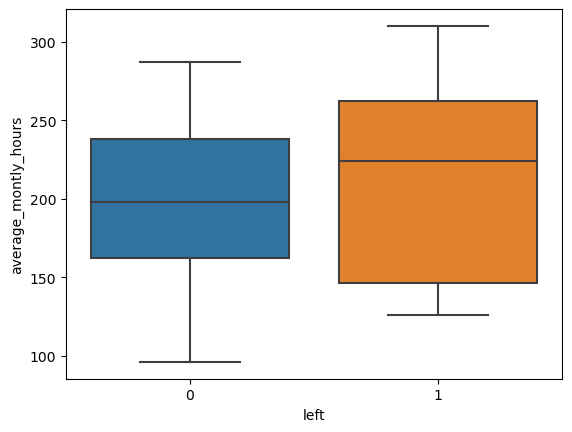

In [51]:
sns.boxplot(x='left',y='average_montly_hours',data=df)
plt.show()

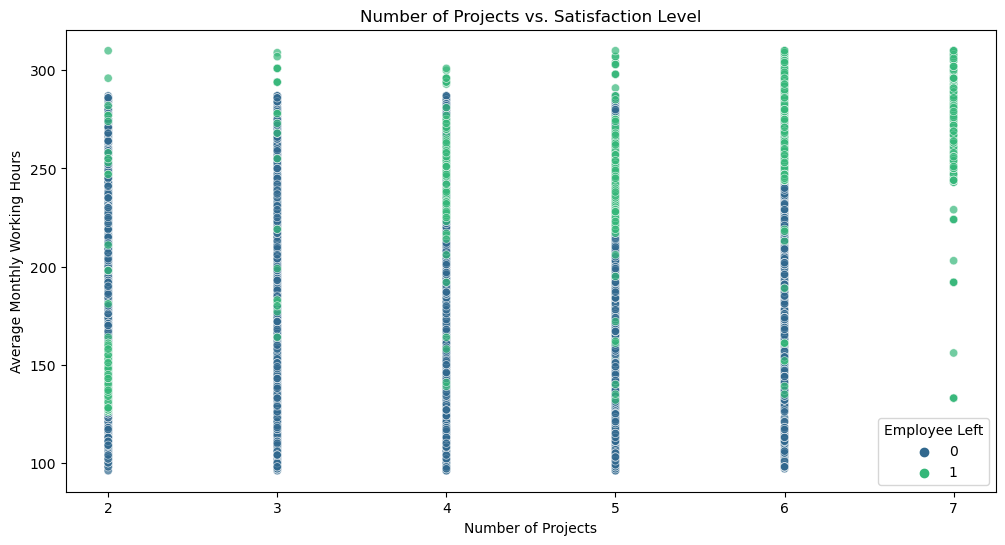

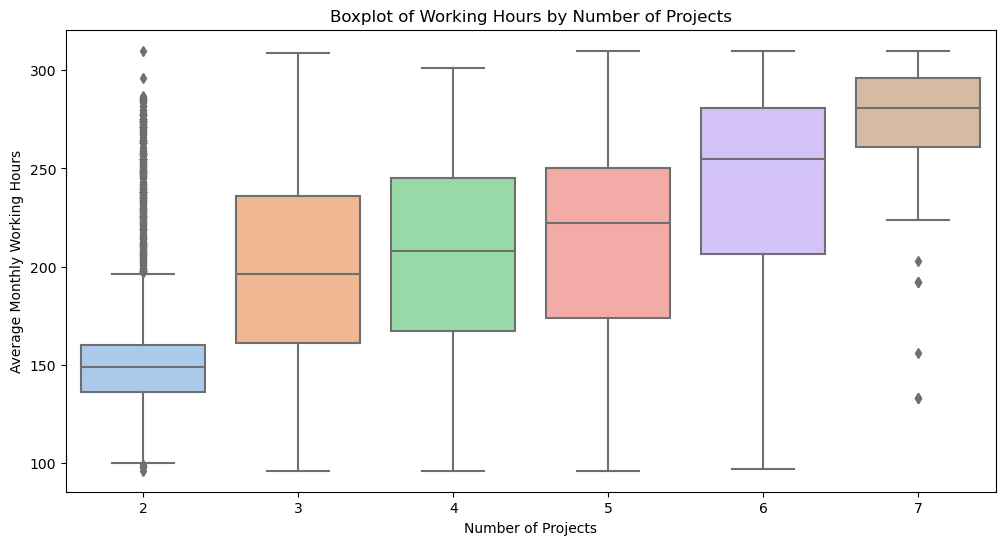

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_project', y='average_montly_hours', hue='left', data=df, palette='viridis', alpha=0.7)
plt.title('Number of Projects vs. Satisfaction Level')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Working Hours')
plt.legend(title='Employee Left')
plt.show()

# Box plot for Number of Projects
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_project', y='average_montly_hours', data=df, palette='pastel')
plt.title('Boxplot of Working Hours by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Working Hours')
plt.show()

## Result: High number of projects employees worked more hours and still left

# 5. Time spent at company

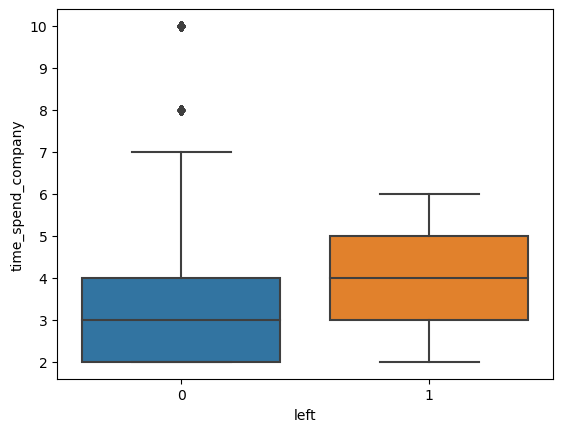

In [61]:
sns.boxplot(x='left',y='time_spend_company',data=df)
plt.show()

In [63]:
###

# We can see from the boxplot that old employees of the company , means experienced ones had left 

In [57]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

# 6. Work Accident

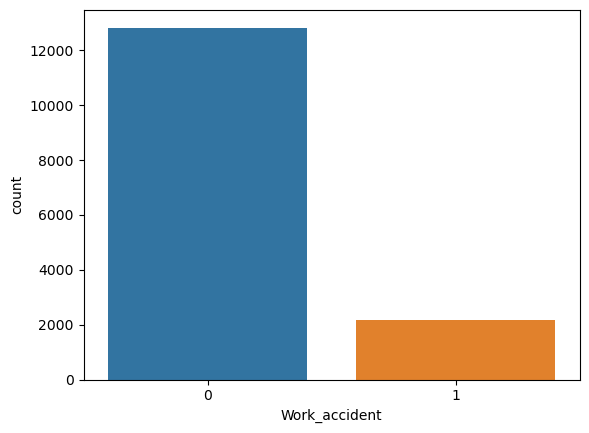

In [59]:
sns.countplot(x='Work_accident',data=df)
plt.show()

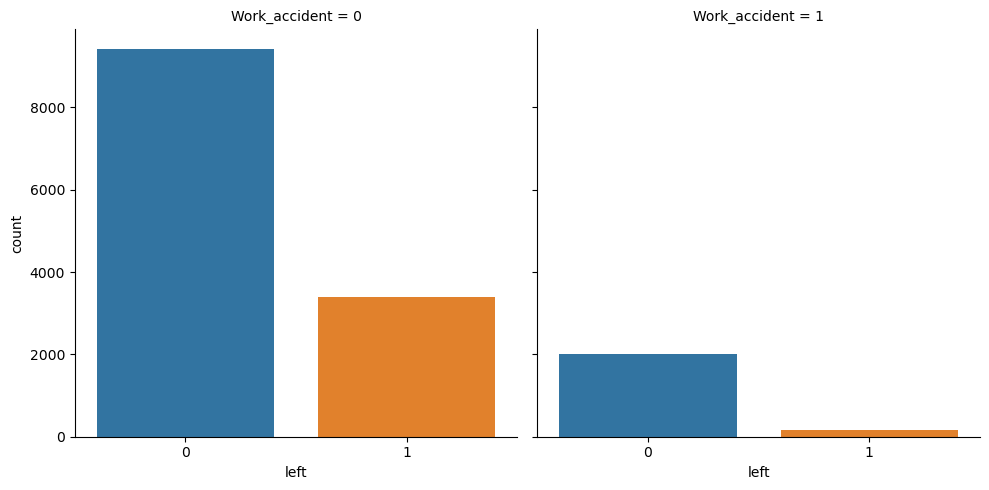

In [60]:
sns.catplot(x='left',col='Work_accident',kind='count',data=df)
plt.show()

### Work Accident doesnt provide significance information

# 7. Promotion Last 5 Years

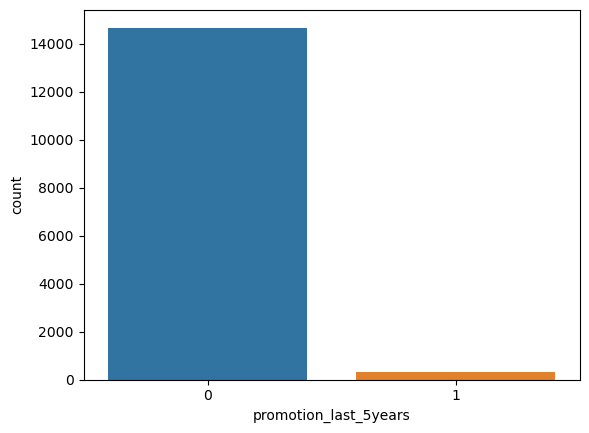

In [64]:
sns.countplot(x='promotion_last_5years',data=df)
plt.show()

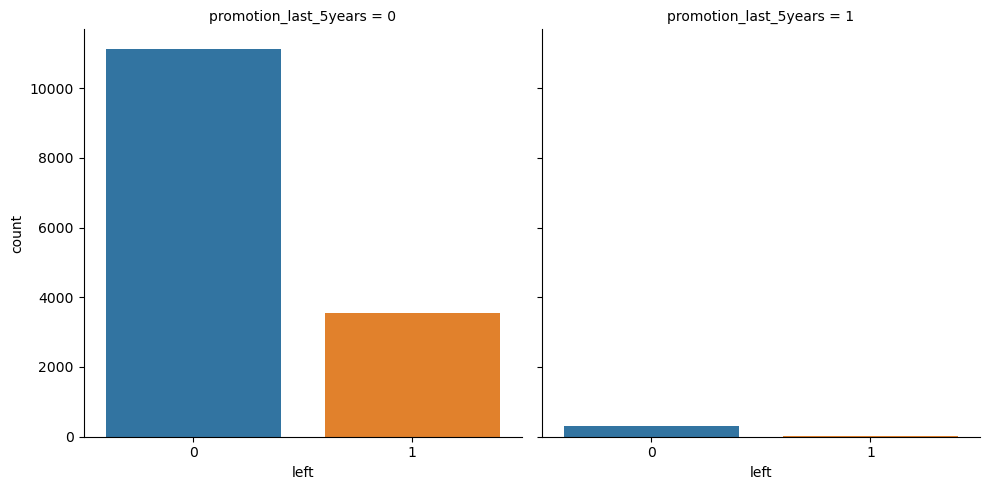

In [67]:
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=df)
plt.show()

# Result: Mostly Employees left who didnt get promotion in last 5 years

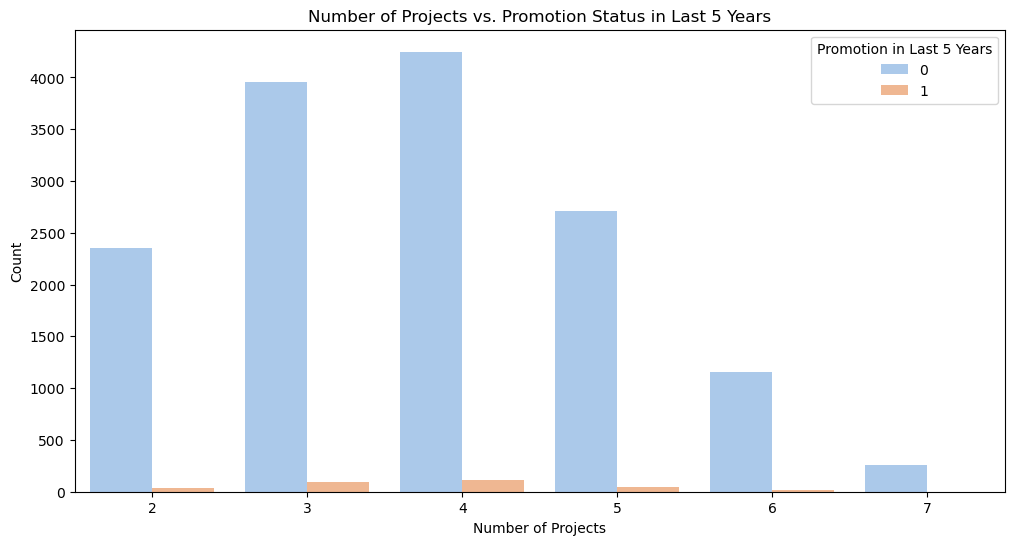

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x='number_project', hue='promotion_last_5years', data=df, palette='pastel')
plt.title('Number of Projects vs. Promotion Status in Last 5 Years')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Promotion in Last 5 Years', loc='upper right')
plt.show()

# Result: One reason can be seen in employees churn that even after there evaluation is good and also done many projects but didnt get a promotion in last 5 years

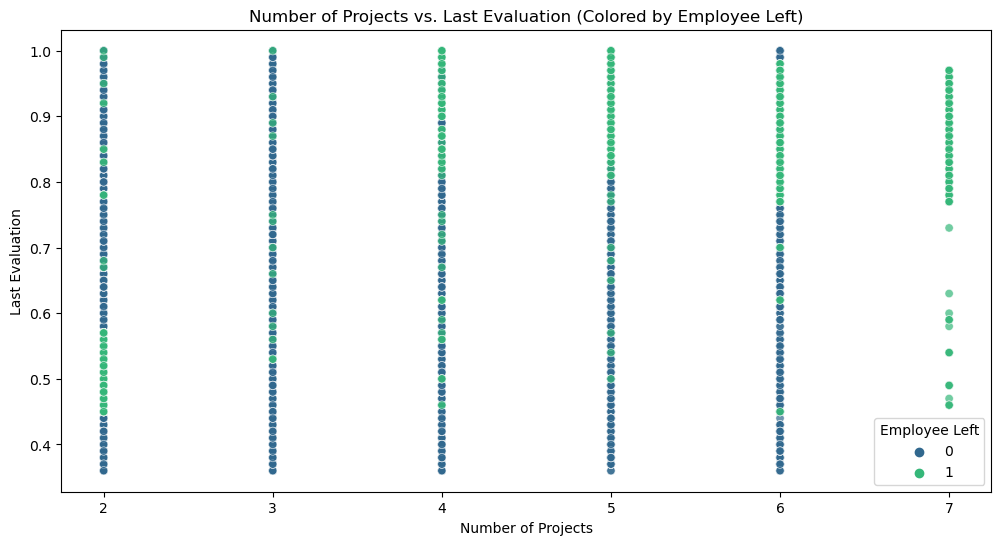

In [69]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_project', y='last_evaluation', hue='left', data=df, palette='viridis', alpha=0.7)
plt.title('Number of Projects vs. Last Evaluation (Colored by Employee Left)')
plt.xlabel('Number of Projects')
plt.ylabel('Last Evaluation')
plt.legend(title='Employee Left')
plt.show()

# 8. Salary

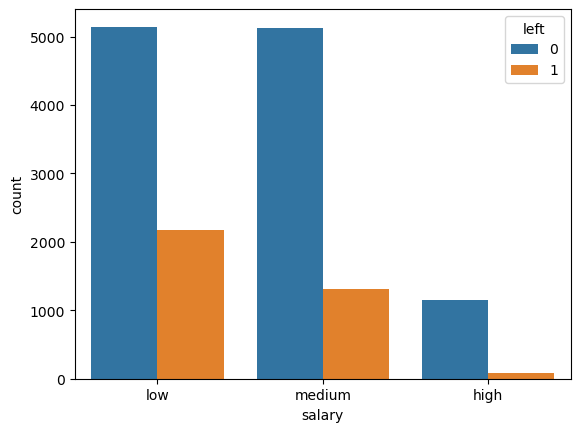

In [71]:
sns.countplot(x='salary',hue='left',data=df)
plt.show()

# Result: Employees churned due to low salary as well

# Salary and Evaluation


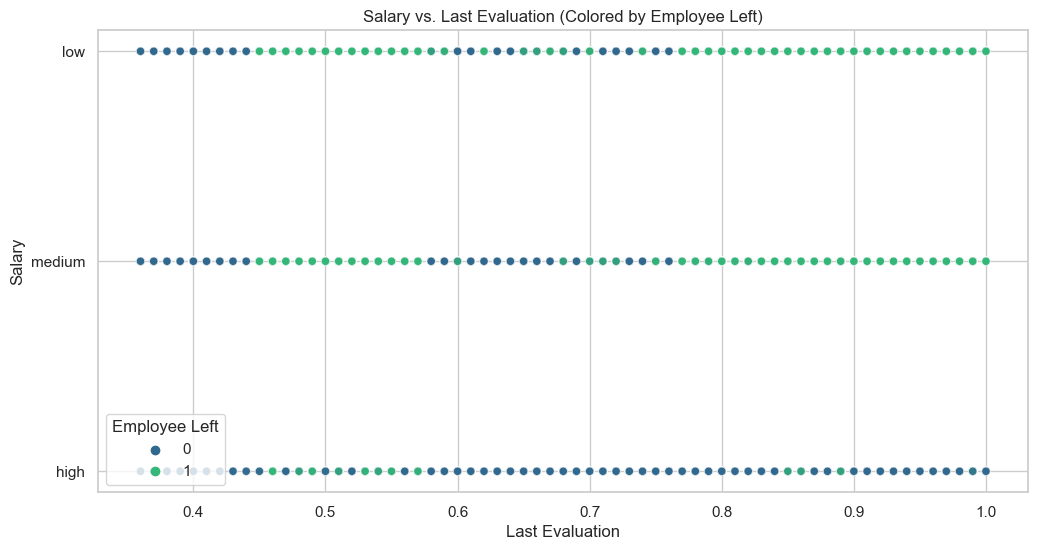

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='last_evaluation', y='salary', hue='left', data=df, palette='viridis', alpha=0.7)
plt.title('Salary vs. Last Evaluation (Colored by Employee Left)')
plt.xlabel('Last Evaluation')
plt.ylabel('Salary')
plt.legend(title='Employee Left')
plt.show()

# Result: Those Employees Although have high  evaluation but with low salary left 

# Summary of EDA: 
### Employees have high number of projects , high evaluation but less satisfaction , reason can be less salary or no promotion in last 5 years

# Suggestions
### Promote such employees or increase the salary